In [14]:
import torch
import torch.nn as nn
import torch.functional as F 
import plotly.express as px

In [3]:
class Net(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.n1 = nn.Linear(1,3)
        self.n2 = nn.Linear(3,1)
        self.a = nn.Sigmoid()

    def forward(self,x):
        x = self.n1(x)
        x = self.a(x)
        x = self.n2(x)
        return x

In [4]:
import matplotlib.pyplot as plt
import numpy as np

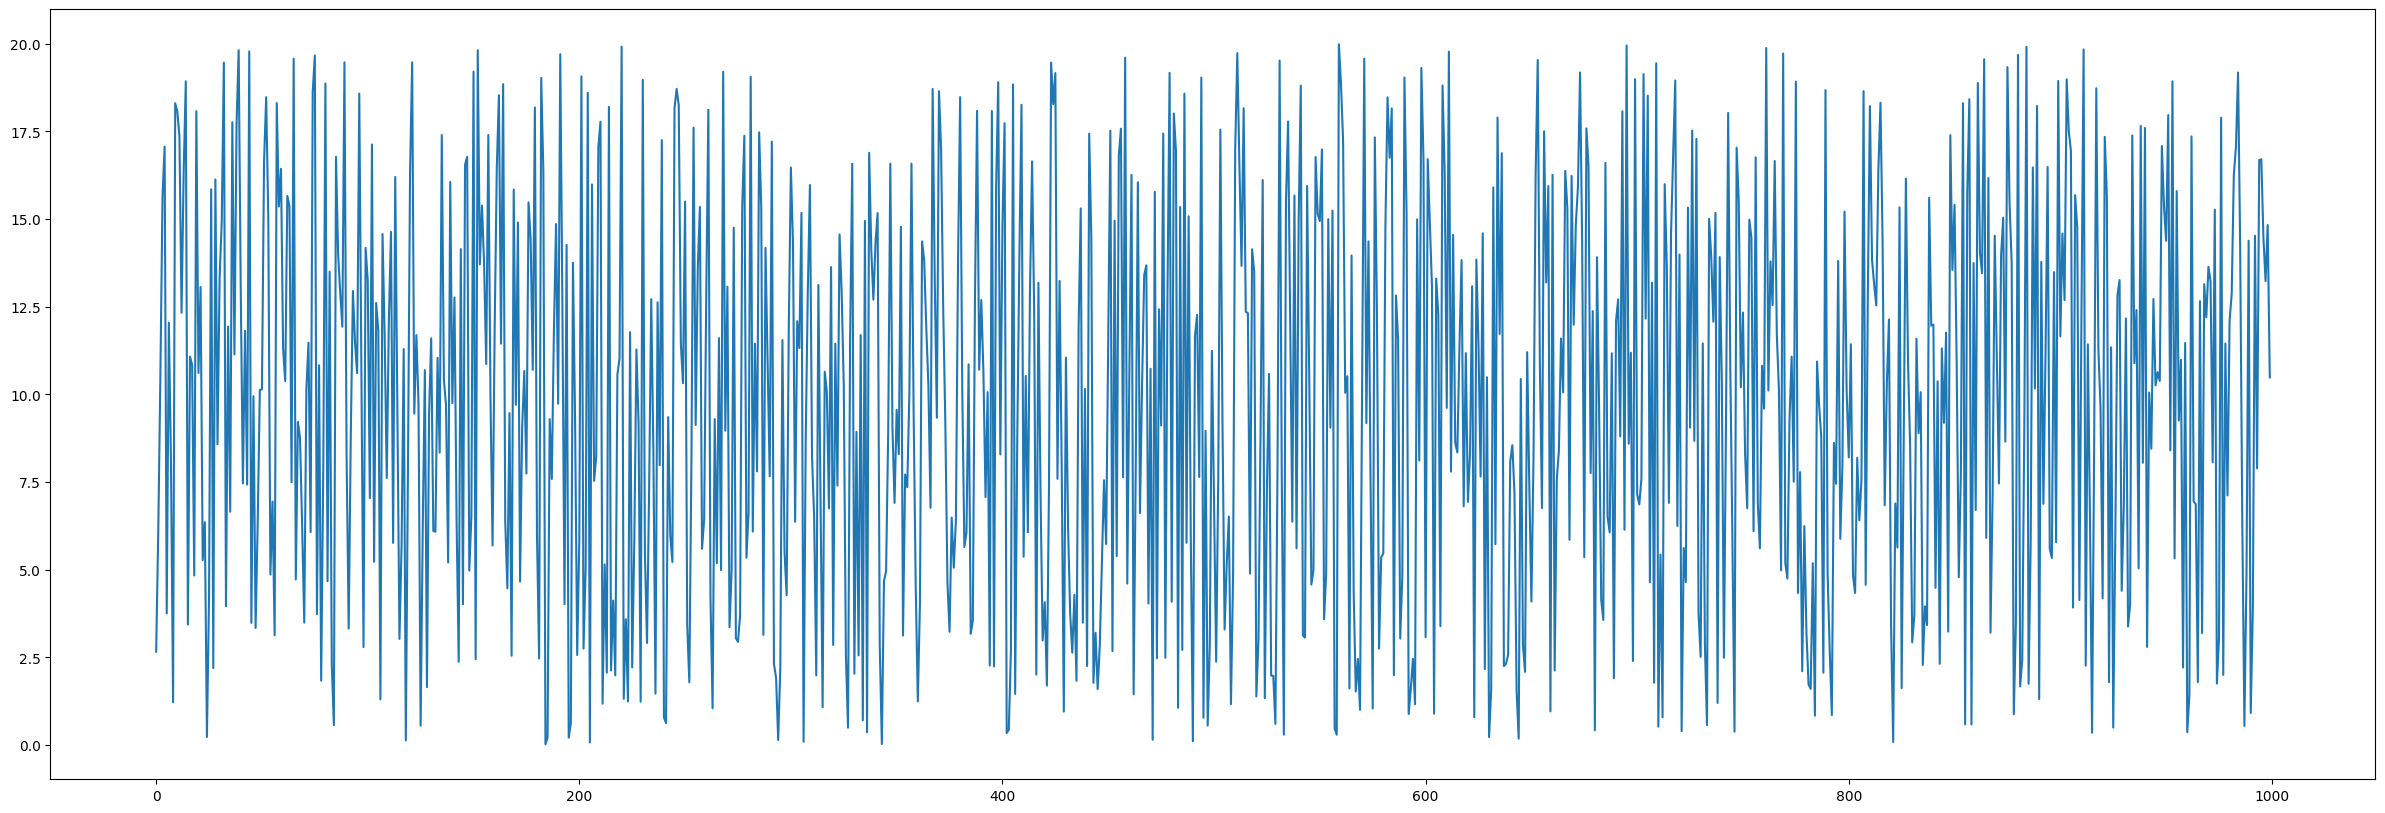

In [5]:
rnd = np.random.random(1000)*20
plt.figure(figsize=(30,10))
plt.plot(rnd)

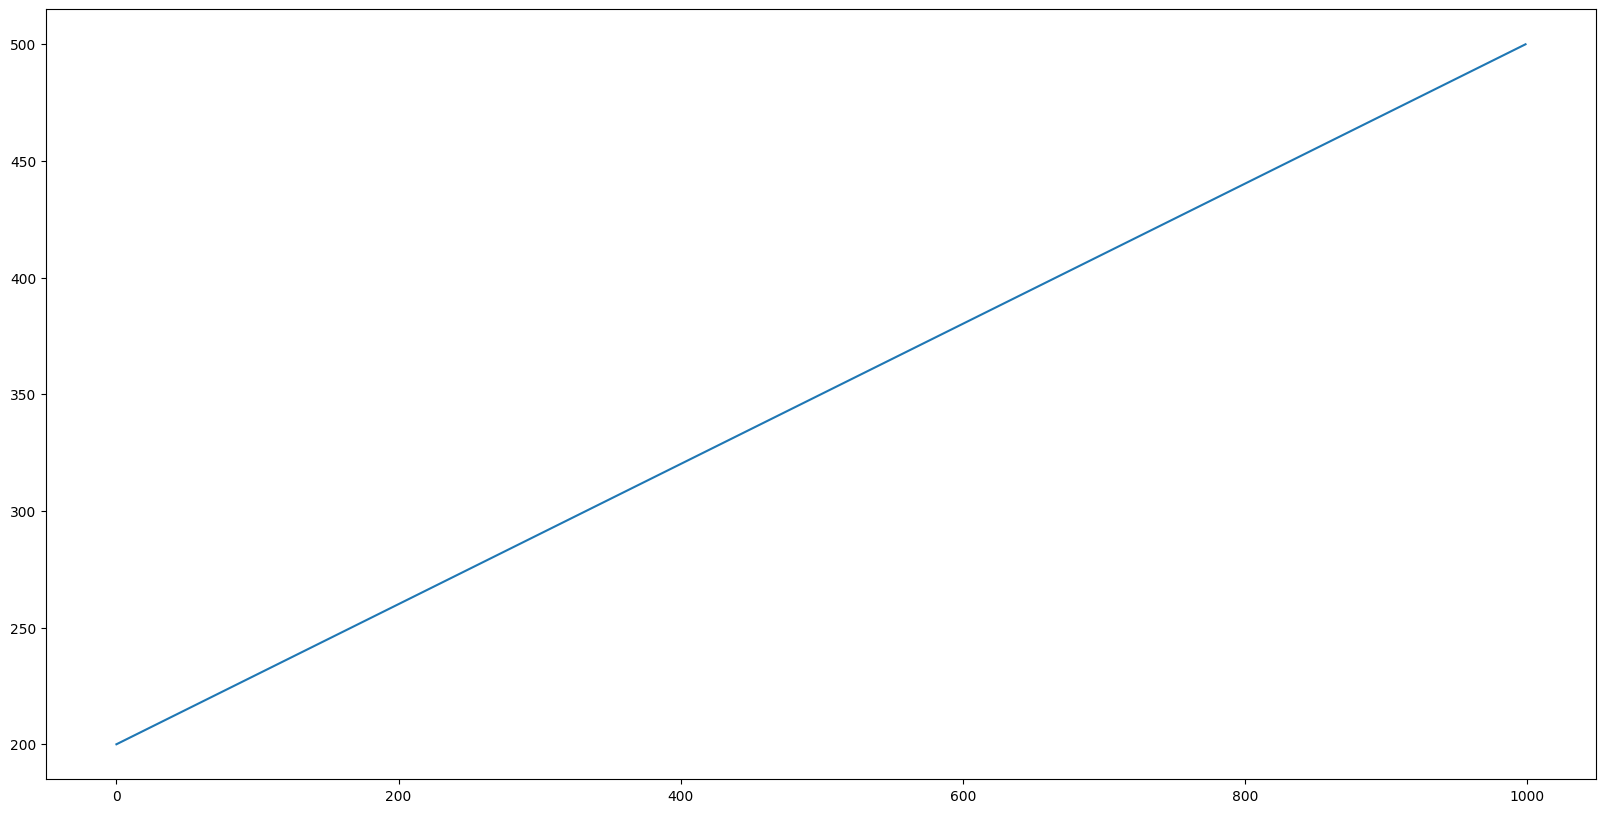

In [6]:
n = np.linspace(200,500,num=1000)
plt.figure(figsize=(20,10))
plt.plot(n)

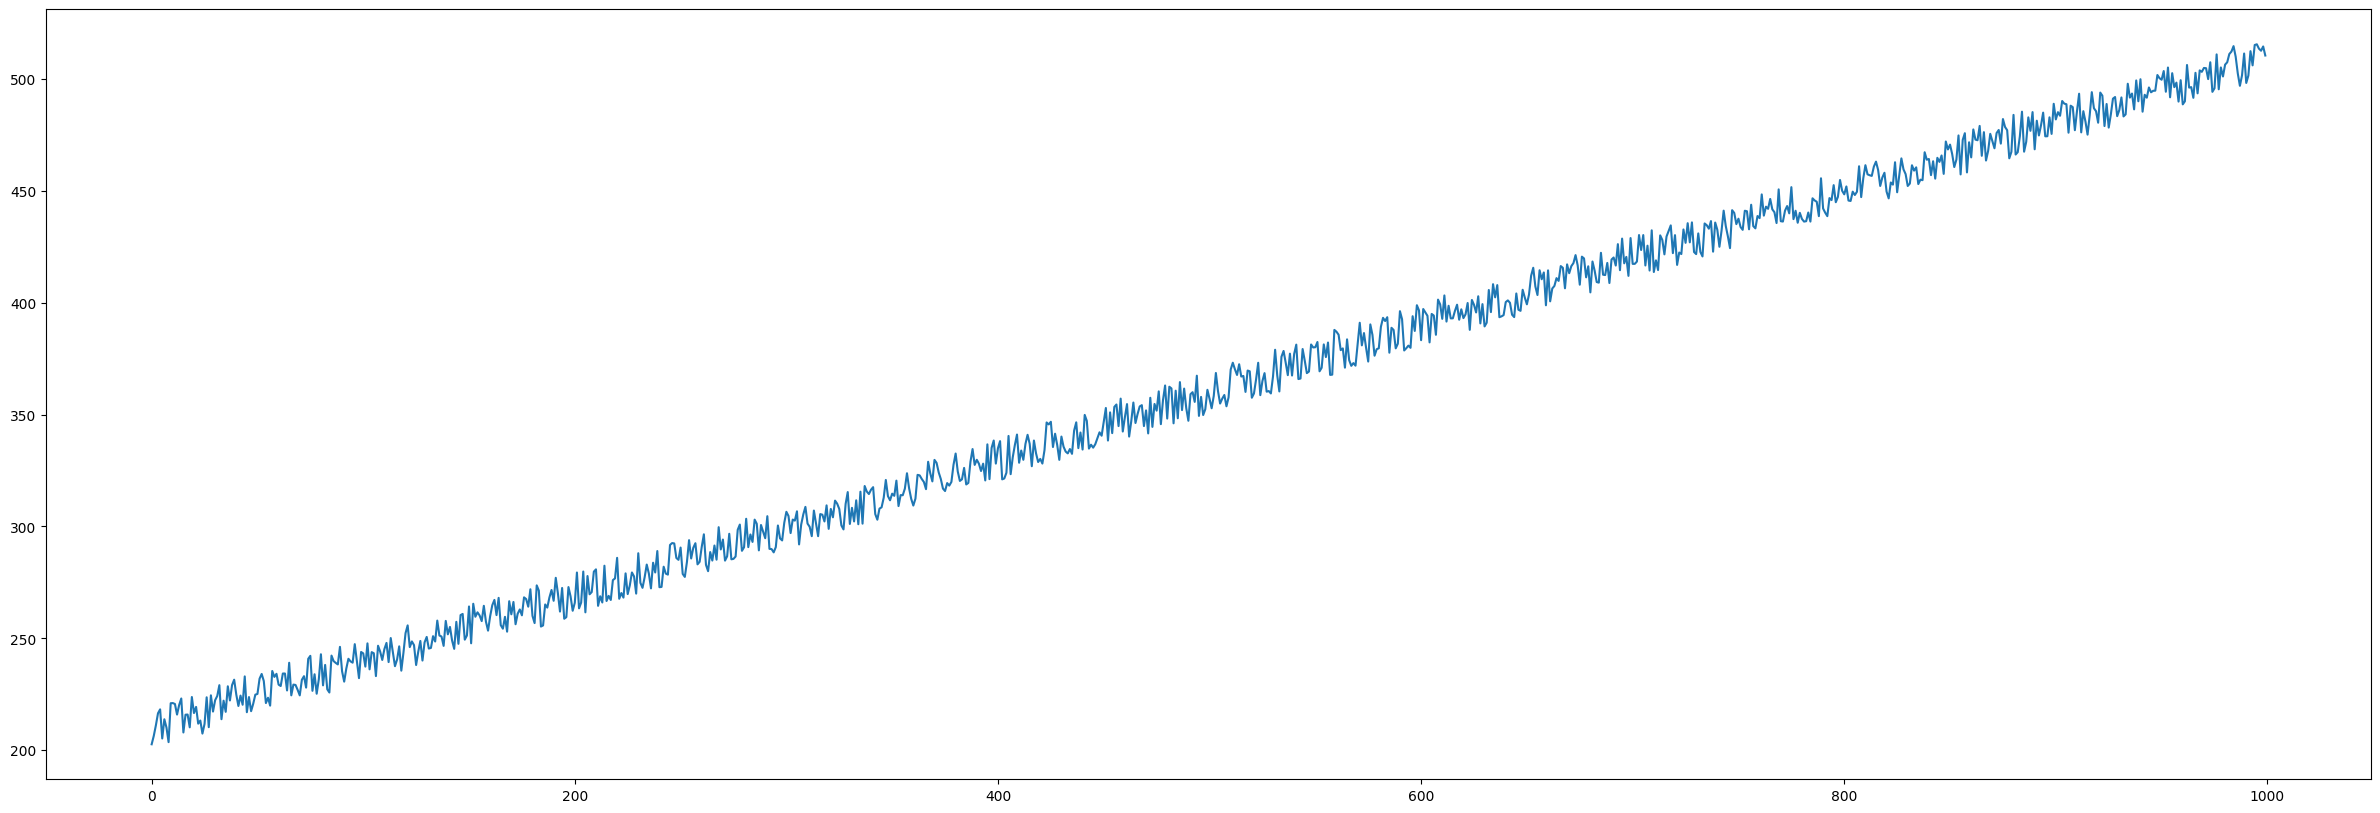

In [7]:
m = n+rnd
plt.figure(figsize=(30,10))
plt.plot(m)

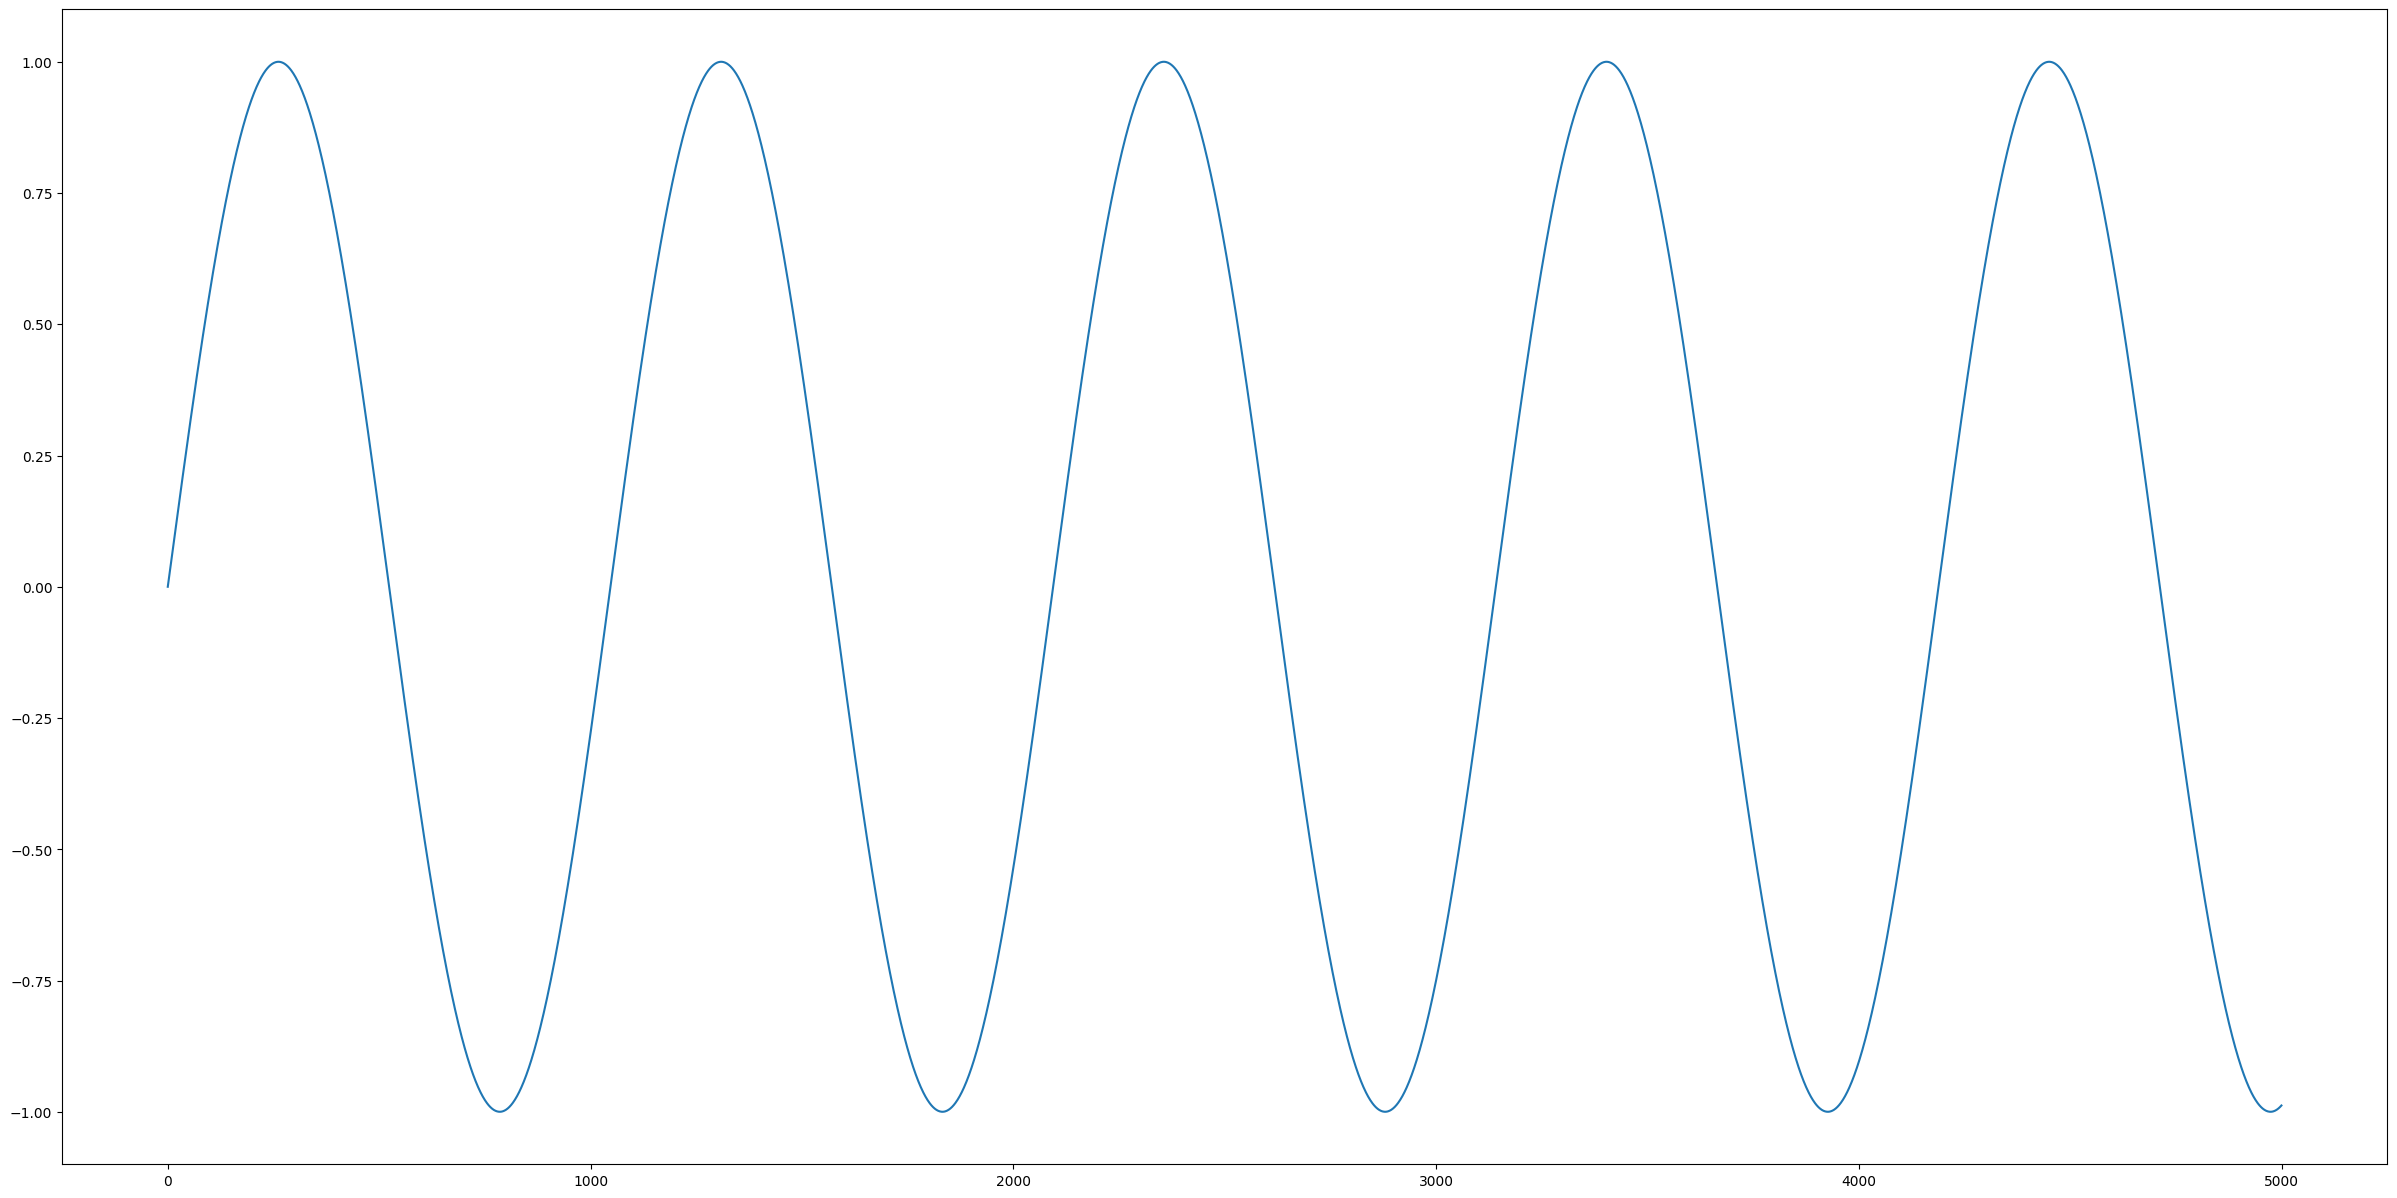

In [8]:
plt.figure(figsize=(30,15))
x = np.sin(np.linspace(0,30,5000))
y = np.linspace(0,30,5000)
plt.plot(x)

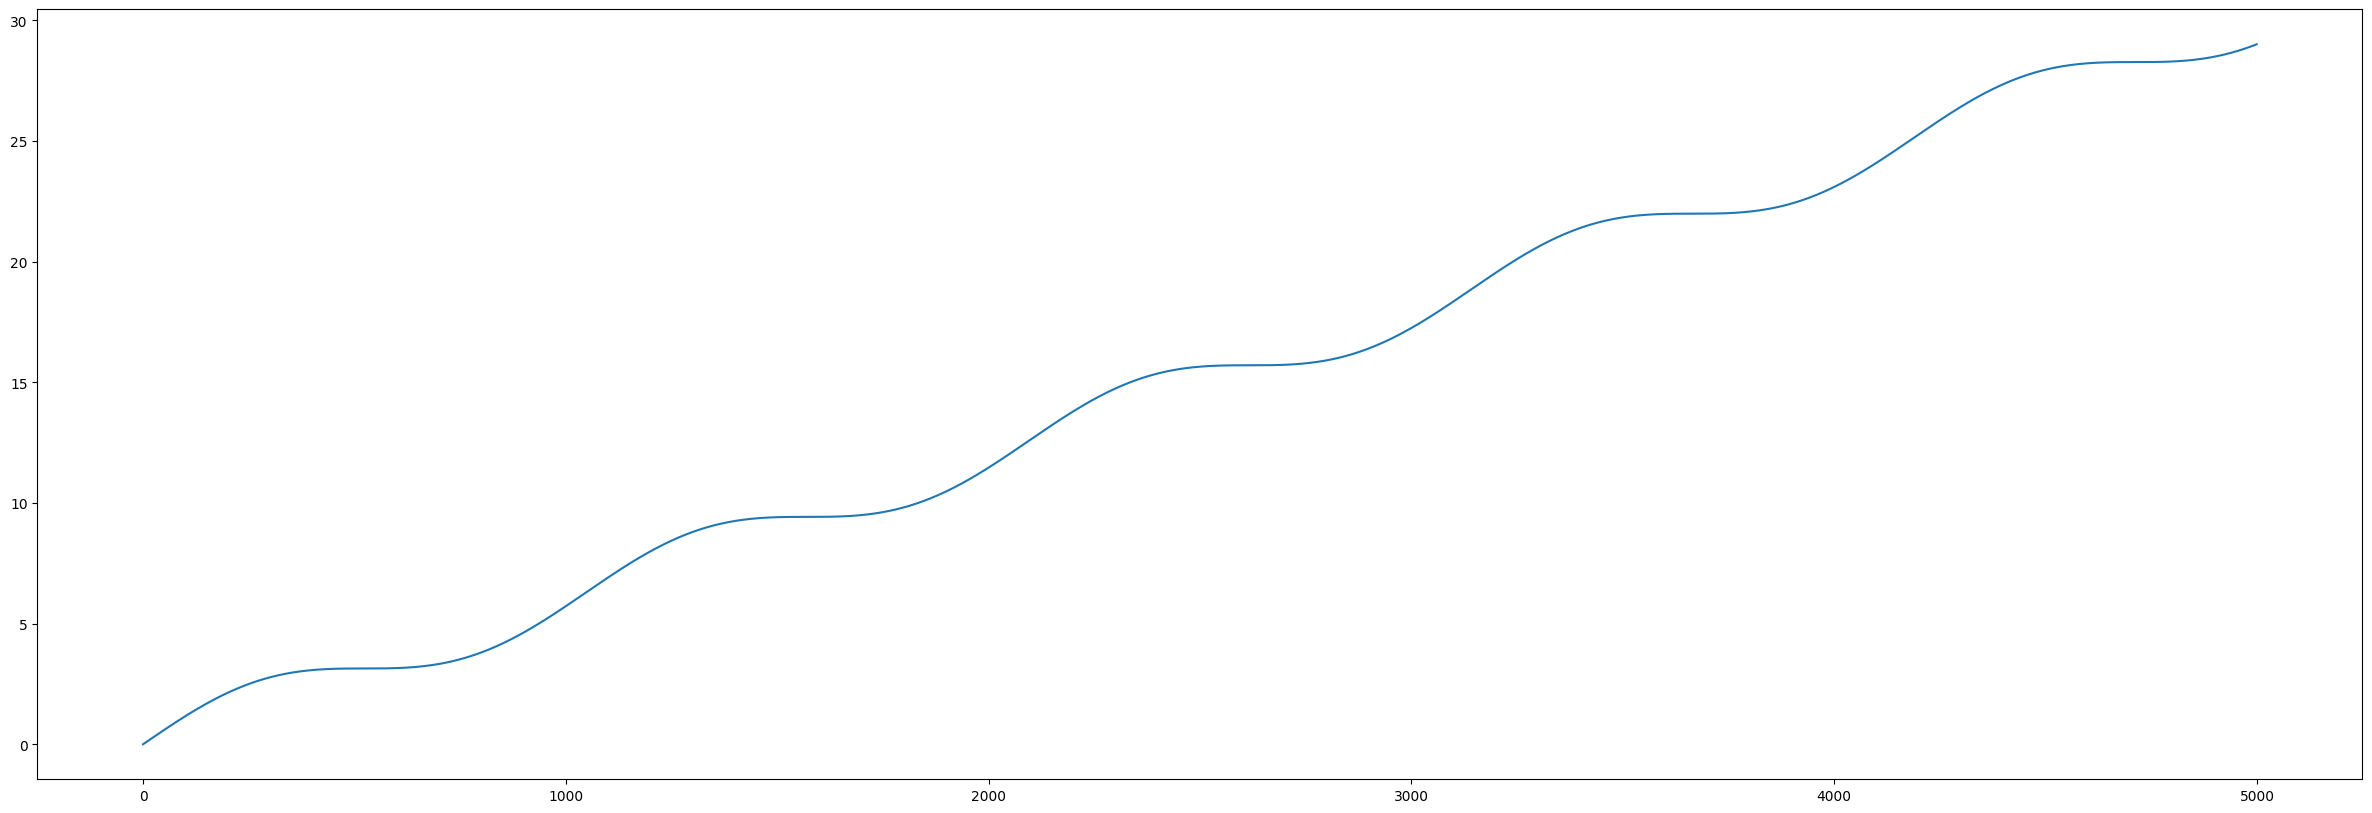

In [9]:
m = np.linspace(0,30,5000) + x
plt.figure(figsize=(30,10))
plt.plot(m)

In [36]:
fig = px.scatter(m)
fig.update()

In [10]:
core = torch.nn.Sequential(
    torch.nn.Linear(1,3),
    torch.nn.ReLU(),
    torch.nn.Linear(3,2),
    torch.nn.ELU()
)

In [11]:
core(torch.tensor([3.]))

tensor([-0.4453,  1.0506], grad_fn=<EluBackward0>)

In [12]:
class net(torch.nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.core = core

    def forward(self,x):
        return self.core(x)

In [13]:
model = net().to("cpu")

crit = torch.optim.SGD(model.parameters(),lr=1e2)
loss = torch.nn.MSELoss()
